In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date
from sklearn.preprocessing import LabelEncoder

In [10]:
dataSet = pd.read_csv("../1m_health_events_dataset.csv")

In [11]:
dataSet.head()

,EventType,Timestamp,Location,Severity,Details,Is_Anomaly
0,emergency_incident,2022-01-01 00:00:00,Boston,high,This is a simulated emergency_incident event.,0
1,health_mention,2022-01-01 00:01:00,Tokyo,low,This is a simulated health_mention event.,0
2,health_mention,2022-01-01 00:01:00,Tokyo,medium,This is a simulated health_mention event.,0
3,vaccination,2022-01-01 00:01:00,Boston,medium,This is a simulated vaccination event.,0
4,general_health_report,2022-01-01 00:03:00,Tokyo,medium,This is a simulated general_health_report event.,0


In [12]:
def process(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')
    df['trans_hour'] = df['Timestamp'].dt.hour
    df['day_of_week'] = df['Timestamp'].dt.day_name()
    df['year_month'] = df['Timestamp'].dt.to_period('M')

    df['trans_date'] = df['Timestamp'].dt.date
    df['trans_time'] = df['Timestamp'].dt.time
    return df

In [13]:
dataSet = process(dataSet)

In [14]:
dataSet.head()

,EventType,Timestamp,Location,Severity,Details,Is_Anomaly,trans_hour,day_of_week,year_month,trans_date,trans_time
0,emergency_incident,2022-01-01 00:00:00,Boston,high,This is a simulated emergency_incident event.,0,0,Saturday,2022-01,2022-01-01,00:00:00
1,health_mention,2022-01-01 00:01:00,Tokyo,low,This is a simulated health_mention event.,0,0,Saturday,2022-01,2022-01-01,00:01:00
2,health_mention,2022-01-01 00:01:00,Tokyo,medium,This is a simulated health_mention event.,0,0,Saturday,2022-01,2022-01-01,00:01:00
3,vaccination,2022-01-01 00:01:00,Boston,medium,This is a simulated vaccination event.,0,0,Saturday,2022-01,2022-01-01,00:01:00
4,general_health_report,2022-01-01 00:03:00,Tokyo,medium,This is a simulated general_health_report event.,0,0,Saturday,2022-01,2022-01-01,00:03:00


In [36]:
categorical_cols = ['trans_hour', 'day_of_week', 'year_month', 'trans_date', 'trans_time', 'EventType', 'Location', 'Severity']

label_encoder = LabelEncoder()
for col in categorical_cols:
    dataSet[col] = label_encoder.fit_transform(dataSet[col])

In [37]:
dataSet.drop(['Timestamp', 'Details'], axis=1, inplace=True)

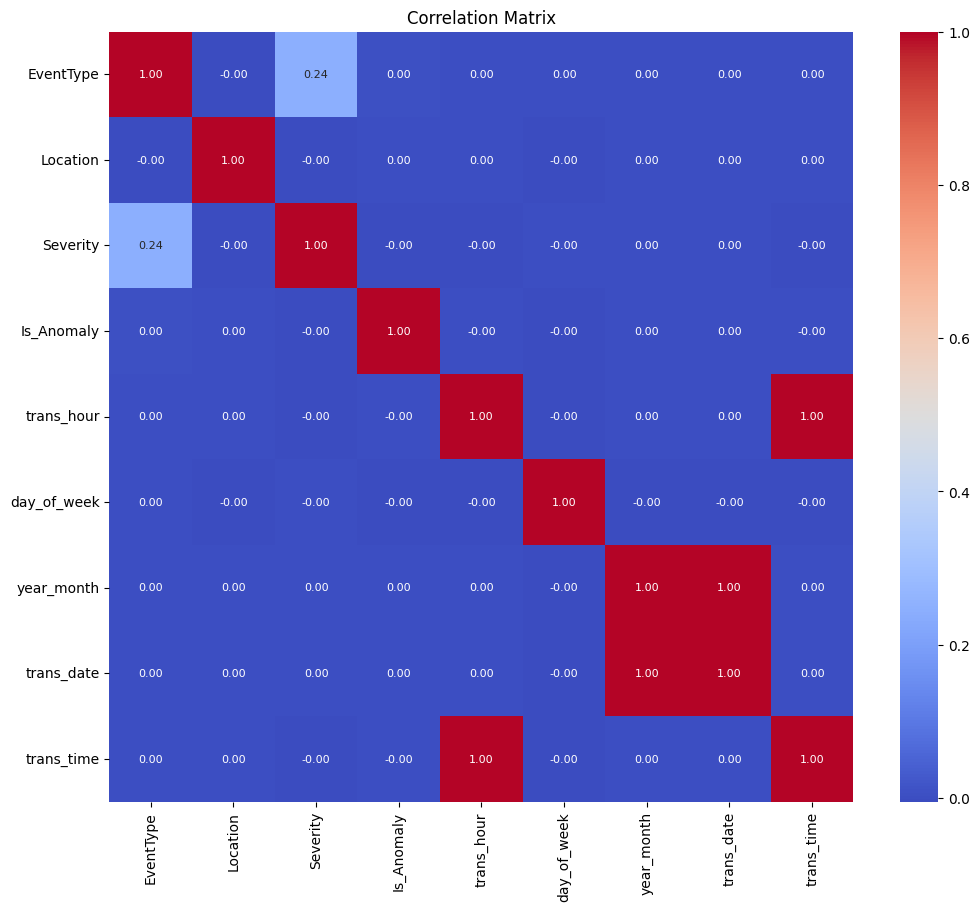

In [38]:
import seaborn as sns
correlation_matrix = dataSet.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
        dataSet.drop(['Is_Anomaly'], axis=1),
        dataSet['Is_Anomaly'],
        test_size=1/4.0,
        random_state=42
    )

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .....................................criterion=gini; total time=   0.4s
[CV] END .....................................criterion=gini; total time=   0.4s
[CV] END .....................................criterion=gini; total time=   0.4s
[CV] END .....................................criterion=gini; total time=   0.4s
[CV] END .....................................criterion=gini; total time=   0.4s
[CV] END ..................................criterion=entropy; total time=   0.4s
[CV] END ..................................criterion=entropy; total time=   0.4s
[CV] END ..................................criterion=entropy; total time=   0.4s
[CV] END ..................................criterion=entropy; total time=   0.4s
[CV] END ..................................criterion=entropy; total time=   0.4s
Best parameters: {'criterion': 'entropy'}
Accuracy on testing set =  0.9997
F1 score on testing set =  0.29906542056074764
Precisi

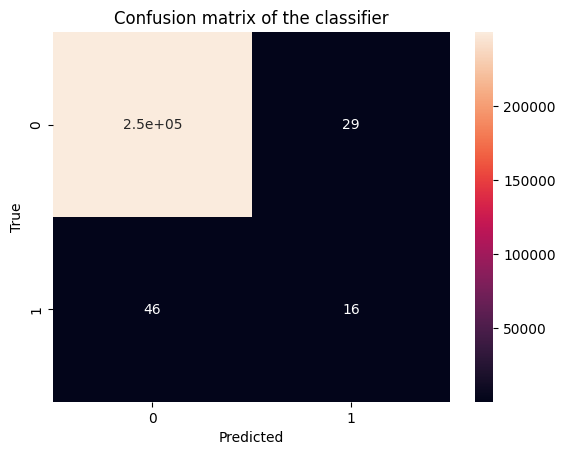

Confusion matrix:
[[249909     29]
 [    46     16]]


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

param_grid = {
    'criterion': ['gini', 'entropy']
}
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='f1', verbose=2)
grid_search.fit(X_train, Y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Save the Model
with open('dtree_model.obj', 'wb') as f:
    pickle.dump(best_model, f)

# Find the accuracy and the F1 Score
Y_test_predictions = best_model.predict(X_test)
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))
print("F1 score on testing set = ", f1_score(Y_test, Y_test_predictions))
print("Precision score on testing set:", precision_score(Y_test, Y_test_predictions))

# Plot the confusion Matrix of classifier
cm = confusion_matrix(Y_test, Y_test_predictions)
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print the values of confusion matrix
print("Confusion matrix:")
print(cm)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END learning_rate=0.125, max_depth=7, n_estimators=786, scale_pos_weight=255.82394366197184; total time=   5.1s
[CV] END learning_rate=0.125, max_depth=7, n_estimators=786, scale_pos_weight=255.82394366197184; total time=   4.6s
[CV] END learning_rate=0.125, max_depth=7, n_estimators=786, scale_pos_weight=255.82394366197184; total time=   4.6s
[CV] END learning_rate=0.125, max_depth=7, n_estimators=786, scale_pos_weight=255.82394366197184; total time=   4.6s
[CV] END learning_rate=0.125, max_depth=7, n_estimators=786, scale_pos_weight=255.82394366197184; total time=   4.4s
Accuracy on testing set: 0.999752
F1 score on testing set: 0.3111111111111111
Precision score on testing set: 0.5


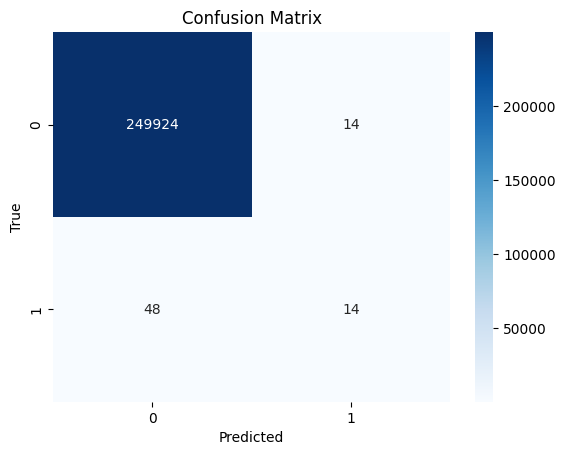

In [45]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

param_grid = {
    'max_depth': [7],
    'n_estimators': [786],
    'learning_rate': [0.125],
    'scale_pos_weight': [255.82394366197184]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=5, verbose=2)
grid_search.fit(X_train, Y_train)
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
print("Accuracy on testing set:", accuracy_score(Y_test, y_pred))
print("F1 score on testing set:", f1_score(Y_test, y_pred))
print("Precision score on testing set:", precision_score(Y_test, y_pred))

cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()